In [1]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 14.2 MB/s eta 0:00:00


In [2]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
grid = np.zeros((4, 4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]


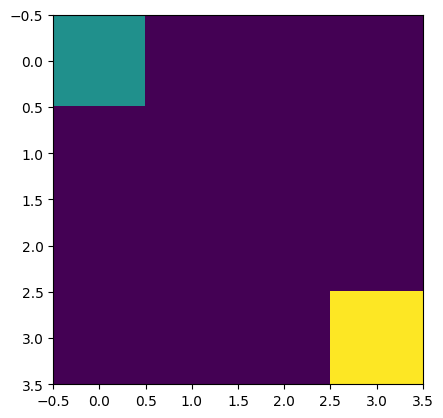

In [4]:
## Start position
start_pos=[0,0]

## Goal position

end_pos=[3,3]

grid[tuple(start_pos)] = 1
grid[tuple(end_pos)] = 2

print(grid)
plt.imshow(grid)
plt.show()

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

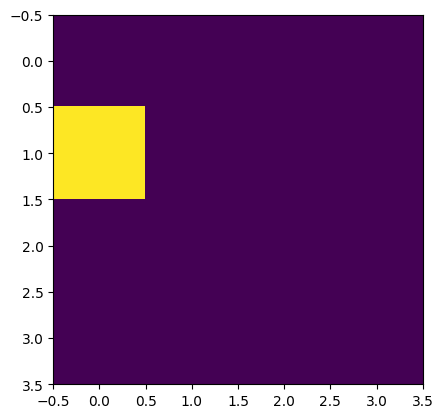

In [5]:
output_grid = widgets.Grid(1,1)
for i in range(10):
    grid = np.zeros((4,4))
    grid[np.random.randint(3), np.random.randint(3)] = 1
    with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        plt.imshow(grid)

    time.sleep(1)

In [33]:
class GridEnvironment1(gym.Env):
    
    def __init__(self):

        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10


    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.obs_pos1 = [1,3]
        self.obs_pos2 = [2,0]
        self.interm_pos1 = [3,2]
        self.interm_pos2 = [0,1]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.obs_pos1)] = 0.4
        self.state[tuple(self.obs_pos2)] = 0.3
        self.state[tuple(self.interm_pos1)] = 0.7
        self.state[tuple(self.interm_pos2)] = 0.5
        self.state[tuple(self.goal_pos)] = 0.8
        self.reward = 0 
        observation = np.ravel_multi_index(self.agent_pos, (4, 4))
        info = {}

        return observation,info
    
    def step(self,action):

      if action==0:
        self.agent_pos[0] +=1 ## Down
      elif action==1:
        self.agent_pos[0] -=1 ## UP
      elif action==2:
        self.agent_pos[1] +=1 ## Right
      elif action==3:
        self.agent_pos[1] -=1 ## Left
      ## cliffing to the boundary
      self.agent_pos = np.clip(self.agent_pos, 0, 3)
      self.state = np.zeros((4,4))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.8
      observation = np.ravel_multi_index(self.agent_pos, (4, 4))
      

      reward = 0
      
      if(self.agent_pos==self.goal_pos).all():
        reward += 10
      elif(self.agent_pos==self.obs_pos1).all():
        reward -=5
        self.timestep += 1
      elif(self.agent_pos==self.obs_pos2).all():
        reward -=3
        self.timestep += 1
      elif(self.agent_pos==self.interm_pos1).all():
        reward += 6
      elif(self.agent_pos==self.interm_pos2).all():
        reward += 4

      terminated = True if self.timestep >= self.max_timesteps or (self.agent_pos == self.goal_pos).all() else False
      truncated = True if np.all((self.agent_pos >= 0) & (self.agent_pos <= 3)) else False

      info = {}

      return  observation ,reward , terminated , truncated , info
    

    def render(self):
      plt.figure()
      plt.imshow(self.state)
      plt.show()


In [34]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

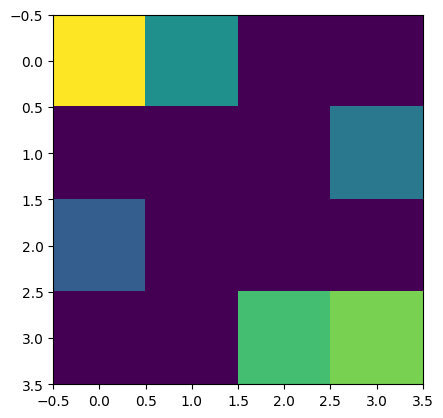

In [35]:
env = GridEnvironment1()
agent = RandomAgent(env)
obs , inf  = env.reset()
env.render()

,,,
,,,
,,,
,,,


Initial State:


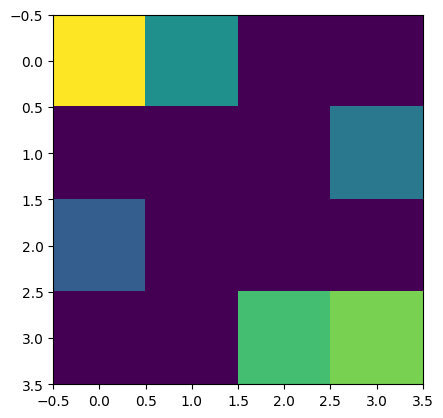

Time Step: 1
Chosen Action: 0
Reward: 0
total_Reward: 0
Current State:


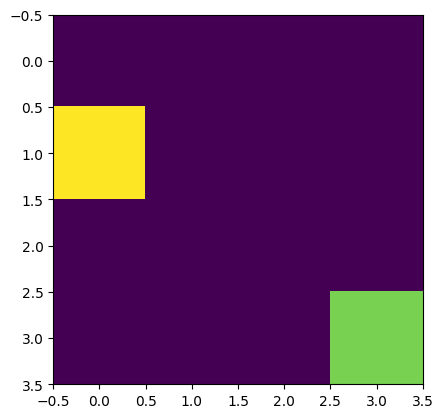

Time Step: 2
Chosen Action: 2
Reward: 0
total_Reward: 0
Current State:


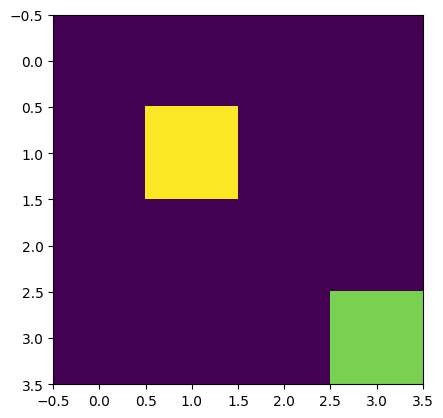

Time Step: 3
Chosen Action: 2
Reward: 0
total_Reward: 0
Current State:


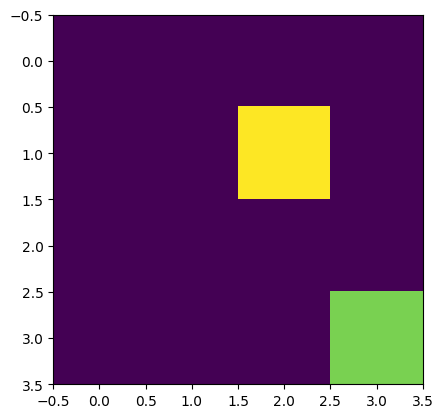

Time Step: 4
Chosen Action: 0
Reward: 0
total_Reward: 0
Current State:


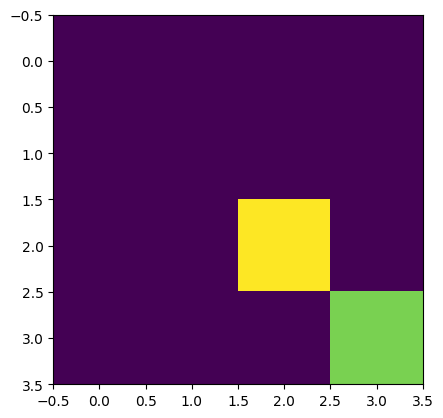

Time Step: 5
Chosen Action: 0
Reward: 6
total_Reward: 6
Current State:


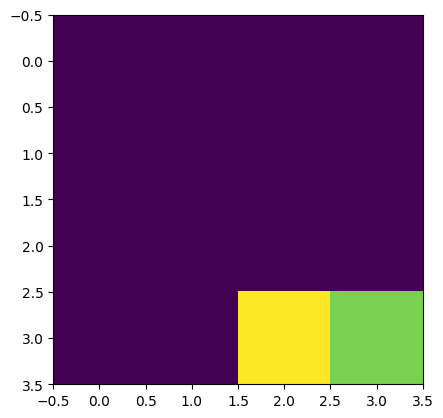

Time Step: 6
Chosen Action: 3
Reward: 0
total_Reward: 6
Current State:


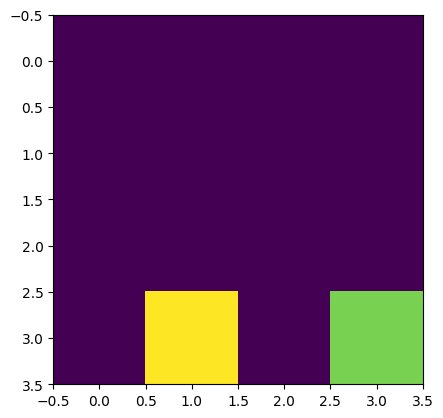

Time Step: 7
Chosen Action: 2
Reward: 6
total_Reward: 12
Current State:


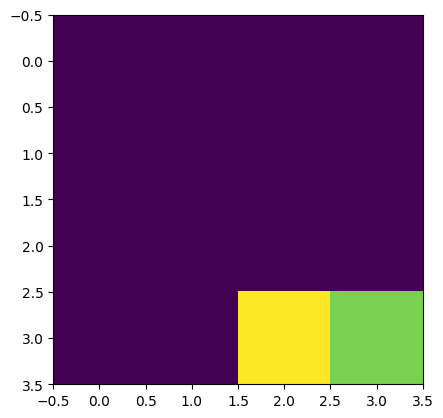

Time Step: 8
Chosen Action: 1
Reward: 0
total_Reward: 12
Current State:


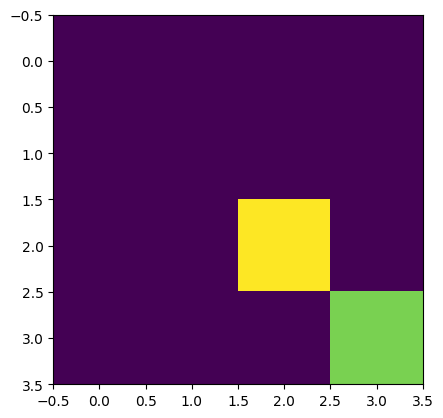

Time Step: 9
Chosen Action: 1
Reward: 0
total_Reward: 12
Current State:


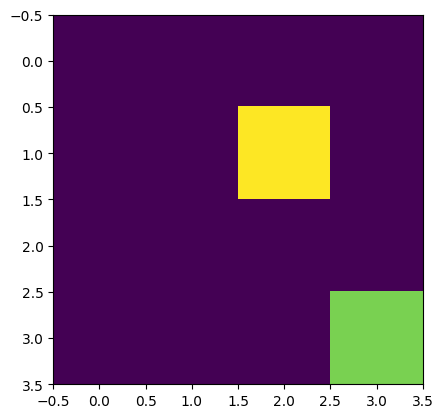

Time Step: 10
Chosen Action: 3
Reward: 0
total_Reward: 12
Current State:


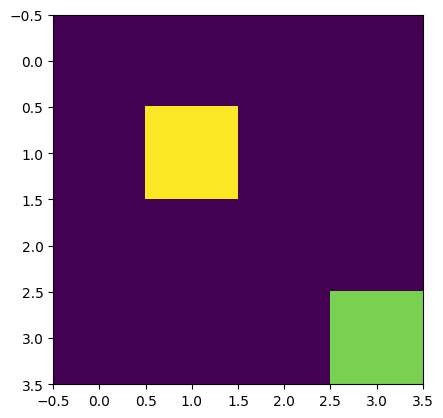

In [36]:
observation, info = env.reset()
output_grid = widgets.Grid(4,4)
print("Initial State:")
env.render()
row,col=0,0
total_reward=0

for i in range(10):
    action = agent.step(observation)
    observation ,reward , terminated , truncated , info = env.step(action)
    total_reward+=reward
    print(f"Time Step: {i+1}")
    print(f"Chosen Action: {action}")
    print(f"Reward: {reward}")
    print(f"total_Reward: {total_reward}")
    print("Current State:")
    env.render()
    col+=1
    if col>3:
        col = 0
        row+=1
    if row>3:
        break
    time.sleep(1)


    if terminated:
        print("Terminated early!")
        break

## Part 2

# SARSA implementation

In [56]:
import random
def sarsa(env, num_episodes, alpha, gamma, epsilon,decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    max_reward=0
    epsilon_ep=[]
    
    for i in range(num_episodes):
        state,_ = env.reset()

        action = epsilon_greedy(q_table, state, env.action_space.n, epsilon)
        total_reward = 0
        terminated = False
        
        while not terminated:
            next_state, reward, terminated, _, _ = env.step(action)

            next_action= epsilon_greedy(q_table, next_state, env.action_space.n, epsilon)
            q_table[state, action] += alpha * (reward + gamma *  q_table[next_state,next_action] - q_table[state, action])
            total_reward += reward
            state = next_state
            action = next_action
        
        rewards.append(total_reward)

        if total_reward > max_reward:
            max_reward = total_reward
        
        if epsilon > 0:
            epsilon -= epsilon * decay_rate
        epsilon_ep.append(epsilon)

        
    
    print("Maximum reward obtained: {}".format(max_reward))
    
    return q_table, rewards,epsilon_ep

def epsilon_greedy(q_table, state, num_actions, epsilon):
    if np.random.uniform() < epsilon:
        action = np.random.randint(num_actions)
    else:

        action = np.argmax(q_table[state, :])

        
    return action

Maximum reward obtained: 2834


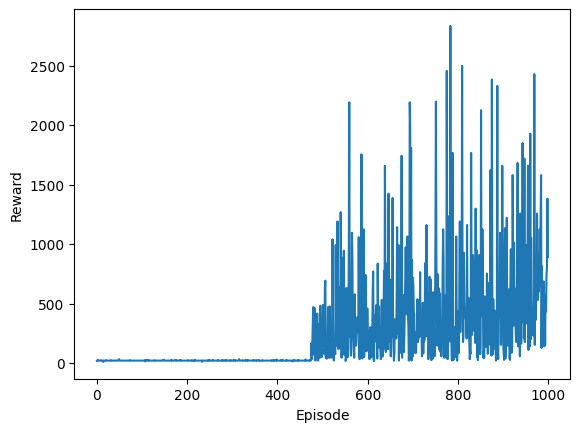

In [47]:
import matplotlib.pyplot as plt

env = GridEnvironment1()
q_table, rewards , epsilon_ep = sarsa(env, 1000, 0.1, 0.99, 0.1,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

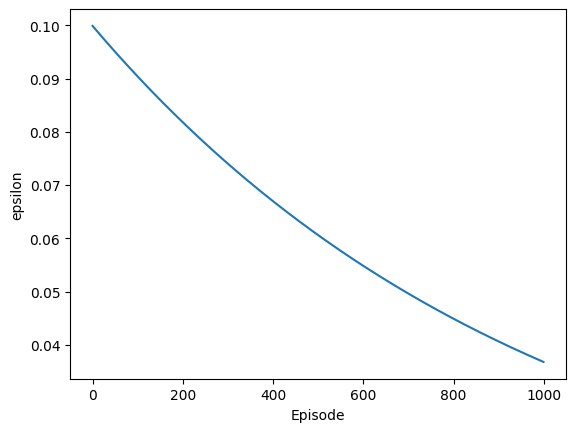

In [48]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

In [49]:
print(rewards)

[19, 20, 26, 20, 20, 20, 20, 20, 20, 24, 20, 20, 20, 20, 9, 20, 20, 20, 20, 20, 24, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 24, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 24, 24, 32, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 24, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 24, 14, 20, 26, 26, 20, 20, 20, 26, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 24, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 26, 26, 26, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 26, 20, 20, 20, 20, 20, 20, 20, 26, 24, 20, 24, 20, 20, 20, 20, 20, 20, 24, 24, 20, 24, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 24, 20, 20, 20, 20, 20, 20, 20, 24, 20, 20, 20, 17, 20, 20, 26, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 9, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 24, 20, 20, 26, 2

In [50]:
print(q_table)

[[ 13.03879616  83.05168904 221.01534813  87.9161983 ]
 [226.28682162 127.0012139   15.58811391  43.33194427]
 [ 70.7445827    0.           0.           0.        ]
 [ -0.5          0.           0.           0.        ]
 [ -0.3         75.41192687  15.91577925   1.39748108]
 [233.33159619  60.33246847  62.2602298   13.66582633]
 [199.6209233    0.          -1.22508022   1.33540949]
 [  2.00687514   0.           0.           0.        ]
 [ 88.09946709   0.          14.43950746  -0.3       ]
 [237.99915889 120.50397351 137.65708209  16.97330967]
 [242.76175764 145.49654955   9.7957813  198.39383629]
 [  9.98938883   0.           0.           6.96932761]
 [ 64.13255431   1.06531369 228.34129955  37.32291401]
 [216.76489291 214.16300017 240.53543496 200.0142523 ]
 [263.52222844 225.9791685   10.         228.41020227]
 [  0.           0.           0.           0.        ]]


## Hyper paramater tunning 


# Tunning alpha

Maximum reward obtained: 2900


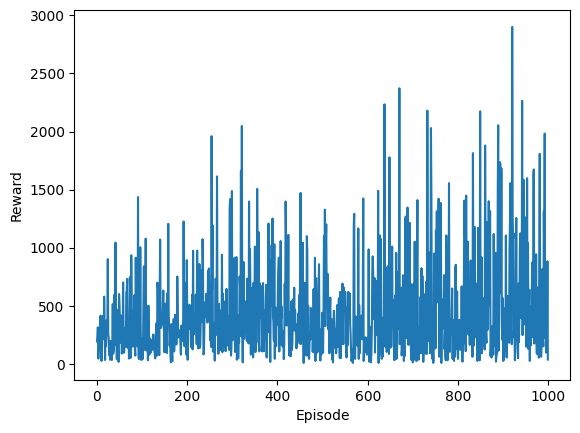

In [51]:
## changing alpha to 0.01
import matplotlib.pyplot as plt

env = GridEnvironment1()
q_table, rewards , epsilon_ep = sarsa(env, 1000, 0.01, 0.99, 0.1,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()



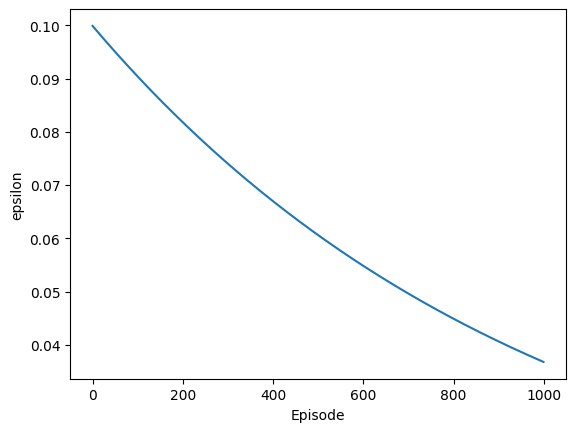

In [52]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

Maximum reward obtained: 80344


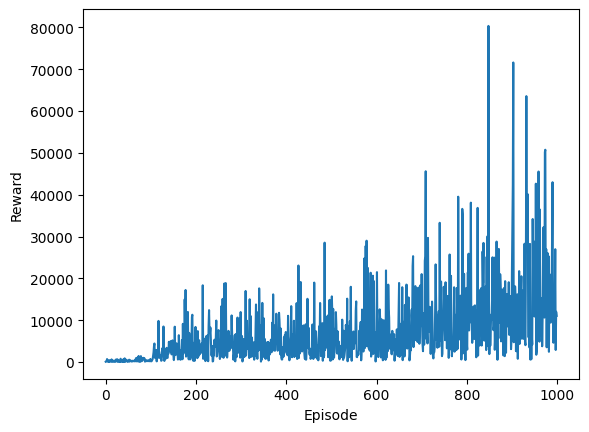

In [58]:
## aplha = 0.001
import matplotlib.pyplot as plt

# env = GridEnvironment1()
q_table, rewards , epsilon_ep = sarsa(env, 1000, 0.001, 0.99, 0.1,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()


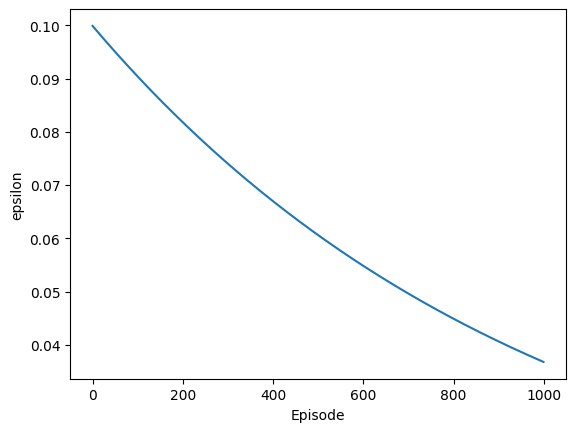

In [59]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

## Tunning the Discount Factor -- gaama

# taking alpha=0.001 , epsilon= 0.1, num_episodes = 1000, decay_rate= 0.001


# gaama=0.5

Maximum reward obtained: 83646


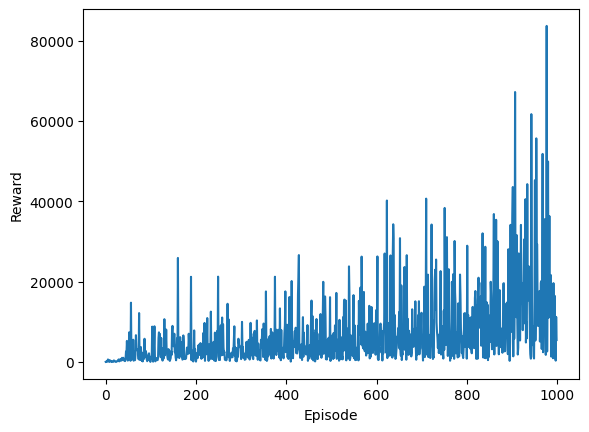

In [60]:
## gaama = 0.5

q_table, rewards , epsilon_ep = sarsa(env, 1000, 0.001, 0.5, 0.1,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

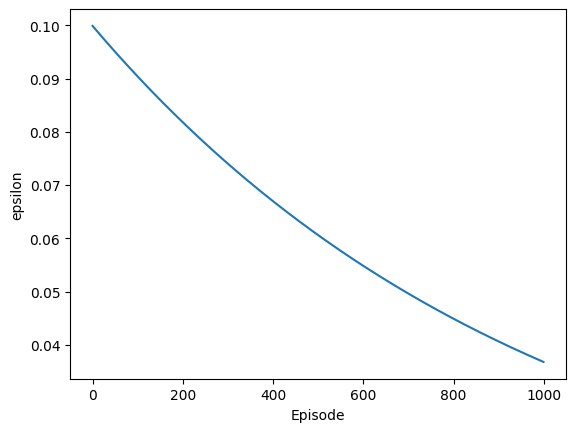

In [61]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

Maximum reward obtained: 84480


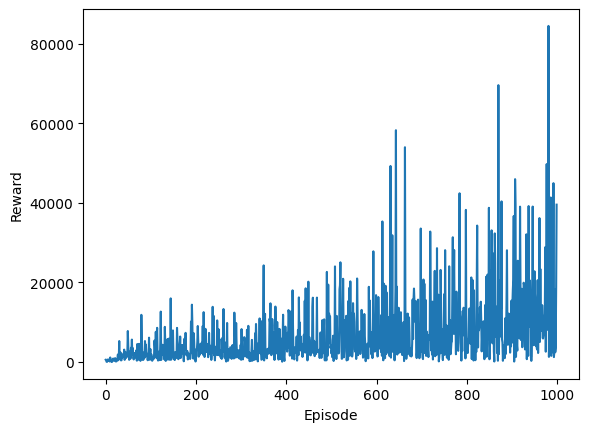

In [62]:
## gaama = 0.7

q_table, rewards , epsilon_ep = sarsa(env, 1000, 0.001, 0.7, 0.1,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

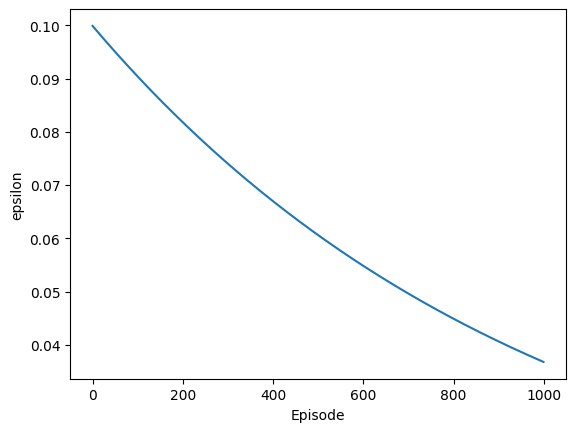

In [63]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

Maximum reward obtained: 57052


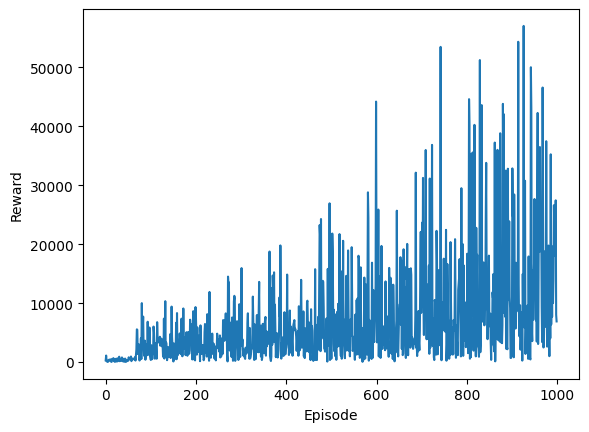

In [64]:
## gaama = 0.9

q_table, rewards , epsilon_ep = sarsa(env, 1000, 0.001, 0.9, 0.1,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

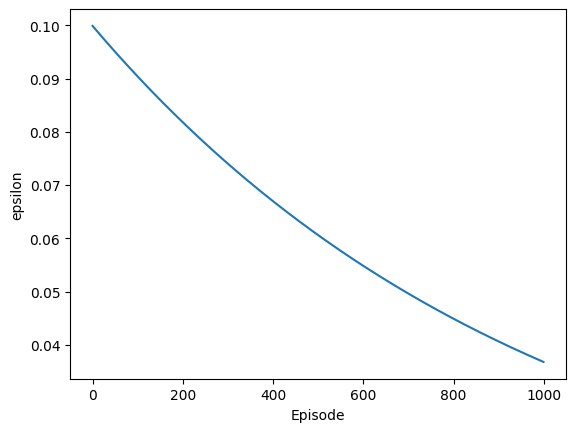

In [68]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

# Tunning epsilon
# taking aplha = 0.001 , num_episodes = 1000 , gaama = 0.9 , decay_rate= 0.01

Maximum reward obtained: 3054


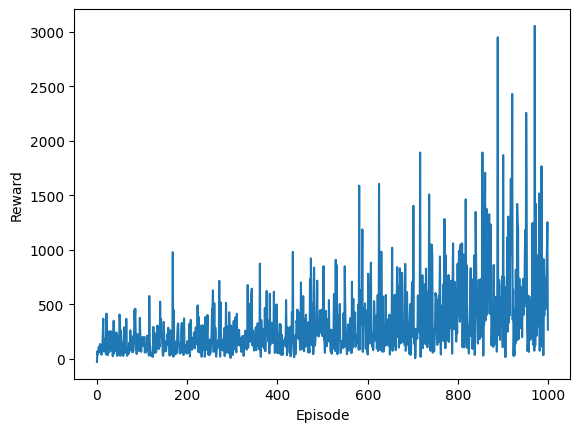

In [69]:
# epsilon = 0.5 

q_table, rewards , epsilon_ep = sarsa(env, 1000, 0.001, 0.9, 0.5,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()


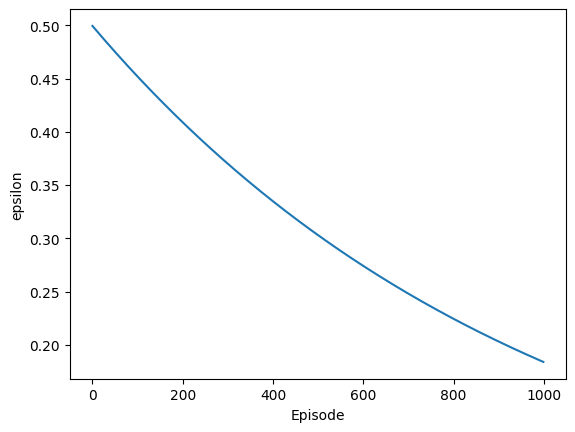

In [70]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

Maximum reward obtained: 8217


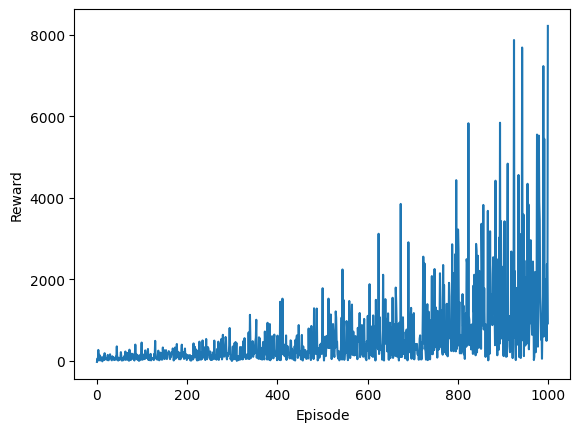

In [75]:
# epsilon = 0.7 

q_table, rewards , epsilon_ep = sarsa(env, 1000, 0.001, 0.9, 0.7,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

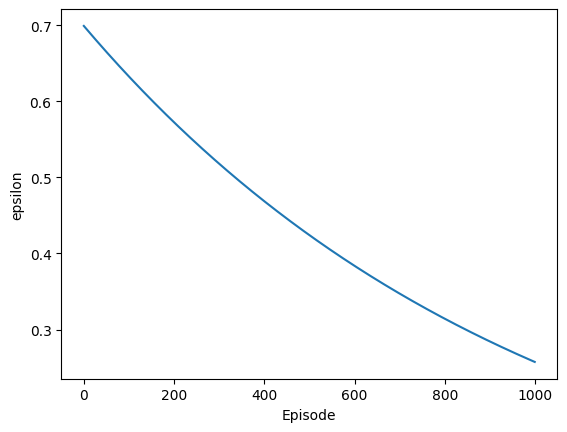

In [74]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

Maximum reward obtained: 3161


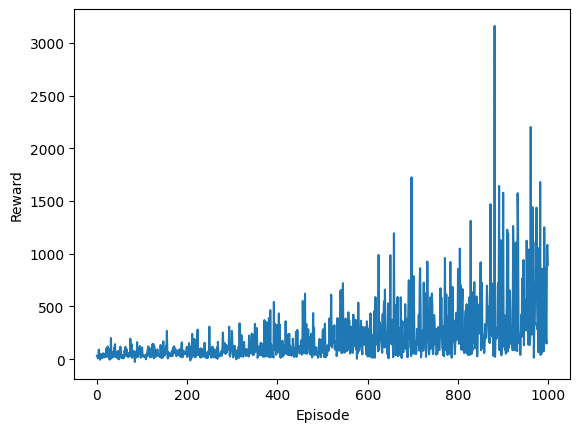

In [76]:
# epsilon = 0.9

q_table, rewards , epsilon_ep = sarsa(env, 1000, 0.001, 0.9, 0.9,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

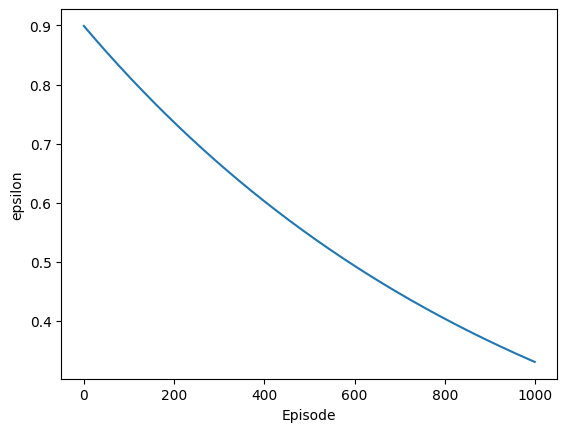

In [77]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

## changing the num_episodes 
# taking alpha = 0.001 , epsilon = 0.7 decay_rate = 0.001 , gaama = 0.9

Maximum reward obtained: 195166


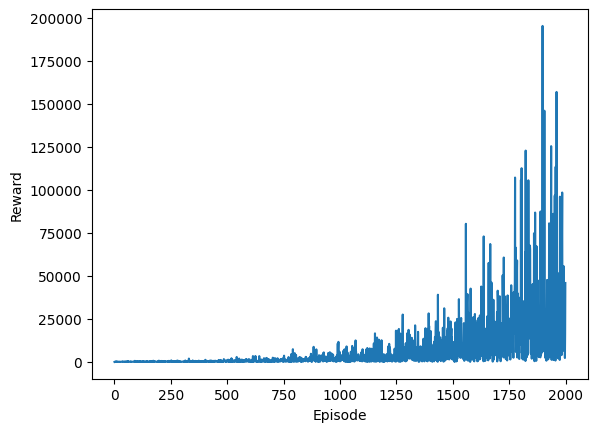

In [78]:
# num_episodes = 2000

q_table, rewards , epsilon_ep = sarsa(env, 2000, 0.001, 0.9, 0.7,0.001)

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

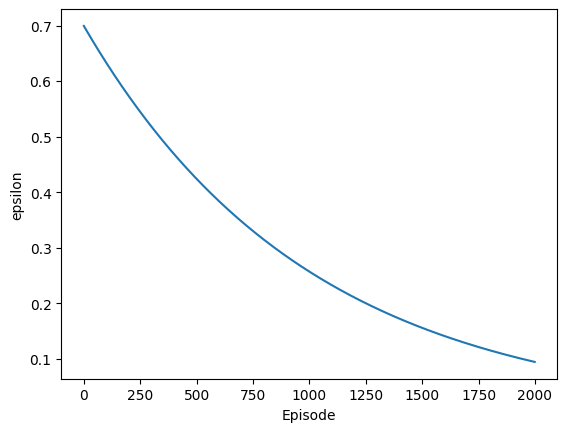

In [79]:
plt.plot(epsilon_ep)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

# alpha = 0.001 , epsilon = 0.7 decay_rate = 0.001 , gaama = 0.9 , num_episodes =2000
# these are the hyperparamters for the final SARSA implementation

